In [8]:
import numpy as np, pandas as pd

# Vectorized String Operations 

One benifit of working with python accompanied with Pandas is that it eases the complexity of working with multiple and complicated string operations.

## Introduction to Pandas String Operations

We saw how use of numpy arrays ease the generalization of arithmatic operations onto elements of each array.

In [9]:
x=np.array([2,3,5,7,11,13])
x*2

array([ 4,  6, 10, 14, 22, 26])

This is called broadcasting of the operation, as studied in detail in the previous Numpy section. For handling similar broadcasting operations over strings Numpy doesn't come handy, which might requires more verbose default python commands 

In [10]:
data=['kali', 'zuza', 'HARSH', 'mANUJ']
[s.capitalize() for s in data]

['Kali', 'Zuza', 'Harsh', 'Manuj']

This would have been sufficient in certain simiple cases, but in instances where there are NULL values in the list, this method would fail

In [12]:
data=['kali', 'Meeta', None ,'HARSH', 'mANUJ']
data=[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas' Vectorized String Operations handles multiple such problems that might originate at specific string operation instances using the `str` attribute of Pandas `Series` or the `Index` Object

In [14]:
names=pd.Series(data)
names

0     kali
1    Meeta
2     None
3    HARSH
4    mANUJ
dtype: object

In [15]:
names.str.capitalize()

0     Kali
1    Meeta
2     None
3    Harsh
4    Manuj
dtype: object

## Pandas String Methods

Given the basic knowledge of default python string operations, it is fairly intuitive to understand the string operations using Pandas, upon merely looking at all the methods that exist.

We'll use the list below to demonstrate the usage of these string operations.

In [16]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

### Methods similar to default Python string methods

Here's a list of Pandas `str` methods that mirror Python string methods

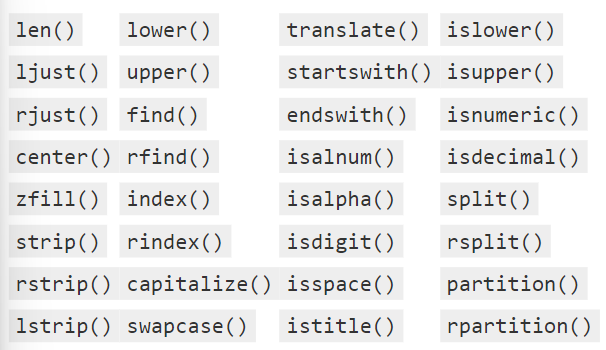

Notice that these might have different return values. Observe the output of the two string operations below

In [17]:
monte.str.lower(), monte.str.len(), monte.str.startswith('T')

(0    graham chapman
 1       john cleese
 2     terry gilliam
 3         eric idle
 4       terry jones
 5     michael palin
 dtype: object,
 0    14
 1    11
 2    13
 3     9
 4    11
 5    13
 dtype: int64,
 0    False
 1    False
 2     True
 3    False
 4     True
 5    False
 dtype: bool)

In [18]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Miscellaneous Methods

These are some extra methods that enable other convenient operations

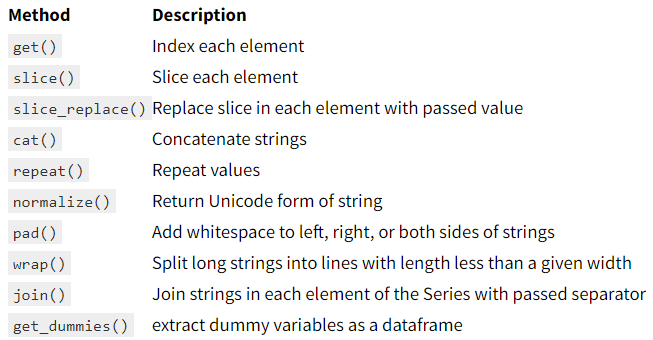

In [19]:
monte.str.slice(1,4)# Try experimenting on these methods here

0    rah
1    ohn
2    err
3    ric
4    err
5    ich
dtype: object

We can even combine multiple such string operation in a convenient and an effecient manner.

For instance say we want to extract the last names of all the names in `monte`.

In [20]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

Another function worth discussing is the `.get_dummies()` method that helps us make use of a feature that - say, has a code indicator. for example consider this DataFrame that contains a column `info` that has charecteristics A, B, C, D for each row, where, say 
- A="born in America,"
- B="born in the United Kingdom,"
- C="likes cheese,"
- D="likes spam"

In [21]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C','B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


The get dummies method will generate a Boolean-like dataframe that will describe `info` for each index in `full_monte`

In [22]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


All these operations when used in sync make playing with string data much easier

## Example: Recipe Database

These vectorized string operations become most useful in cleaning up messy real-world data. Let's look at this database that contains text based on dish recepies. We'll play with the database for a little and try to find what all we can make from the ingredients that we currently have with us.

Try downloading the dataset from "https://github.com/sameergarg/scala-elasticsearch/raw/master/conf/recipeitems-latest.json-full.zip"

The whole JSON file is made of a multiple lines of codes of individual/standalone JSON files

So we might need to sew them together into one big list of different lines of data. The illegible code underneath might help

In [23]:
# read the entire file into a Python array
with open('recipeitems-latest.json',encoding='utf8') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

C:\Users\denis\AppData\Local\Temp\ipykernel_49368\594690038.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  recipes = pd.read_json(data_json)


In [24]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

There's a lot of messy information here, which is how stuff usually looks like when scraped from web. Let's first start by analysing the `ingredients` coloumn.

In [25]:
recipes['ingredients'].str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

Let's see which Dish has the longest ingredient list

In [36]:
Longest_Ingredient_Index=np.argmax(recipes['ingredients'].str.len())
recipes.loc[Longest_Ingredient_Index,'name']

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

*damn

Let's look at some indian or South Asian Recepies

In [64]:
print(recipes.dtypes)
recipes.loc[recipes['description'].str.contains('(I|i)ndia|(S|s)outh (A|a)sian').fillna(False),'name']

_id                   object
name                  object
ingredients           object
url                   object
image                 object
ts                    object
cookTime              object
source                object
recipeYield           object
datePublished         object
prepTime              object
description           object
totalTime             object
creator               object
recipeCategory        object
dateModified          object
recipeInstructions    object
dtype: object


C:\Users\denis\AppData\Local\Temp\ipykernel_49368\1373283780.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipes.loc[recipes['description'].str.contains('(I|i)ndia|(S|s)outh (A|a)sian').fillna(False),'name']


41                                                   Labneh
92                                            Green chutney
152       Spiced cannon of salt marsh lamb with chicken ...
162                   Papeta pur eeda with cod masala salad
165             Sheek kavaab naan with malai tikka naanwich
                                ...                        
172565                     Warm Chickpea Chaat (Dahi-Misal)
172684     Roast salmon with dill and mustard and pea purée
172737                                   Indian Sloppy Joes
173102    Spiced Indian potato croquettes with mint and ...
173207                       Egg Vindaloo (Spicy Egg Curry)
Name: name, Length: 1084, dtype: object

Or how many of them have coffee as an ingredient

In [70]:
recipes.loc[recipes['ingredients'].str.contains('(C|c)offee'),'name']

C:\Users\denis\AppData\Local\Temp\ipykernel_49368\4040299789.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipes.loc[recipes['ingredients'].str.contains('(C|c)offee'),'name']


37                                        Iced Irish Coffee
104                                Pots de Crème a l’Orange
174                                Classic Chocolate Mousse
186       Chocolate-Coffee Tart with Almonds and Caramel...
189                 Chocolate Chip Caramel Ice Cream Sundae
                                ...                        
172893                                         Crazy Coffee
172940                                  Muddy Mocha Madness
173044                                         Crazy Coffee
173062                          Brown Sugar Beer Glazed Ham
173218                            Coffee Crusted Pork Chops
Name: name, Length: 1382, dtype: object

Try integrating this with the `re` module for maximum efficiency in your data wrangling tasks***